In [1]:
using Automata
using Images
using Plots

In [2]:
mk(dir) = isdir(dir) ? nothing : mkdir(dir)

mk (generic function with 1 method)

In [3]:
mk("elementary")
mk("totalistic")
mk("totalistic_diff")

"totalistic_diff"

In [3]:
rule = 110
steps = 1000
iterations = 2^10 - 1

1023

In [ ]:
for i = 1:iterations
    initial_state = zeros(Bool, Int(ceil(log2(i+1))))
    for j = 1:length(initial_state)
        initial_state[j] = i >> (j - 1) & 1
    end
    render("random_initial/elementary/$i.png", elementary(rule, steps, initial_state))
end

In [4]:
code = 2530
colors = 4

4

In [5]:
diff_arr(arr) = abs.(diff(arr, dims=2))

diff_arr (generic function with 1 method)

In [ ]:
for i = 1:1000
    initial_state = zeros(UInt8, Int(ceil(log(colors, i+1))))
    acc = i
    for j = length(initial_state):-1:1
        digit = colors ^ (j - 1)
        initial_state[length(initial_state) - j + 1] = acc ÷ digit
        acc %= digit
    end
    history = totalistic(code, steps, colors, initial_state)
    render("random_initial/totalistic/$(string(i, base=colors)).png", history)
    render("random_initial/totalistic_diff/$(string(i, base=colors)).png", history, [diff_arr])
end

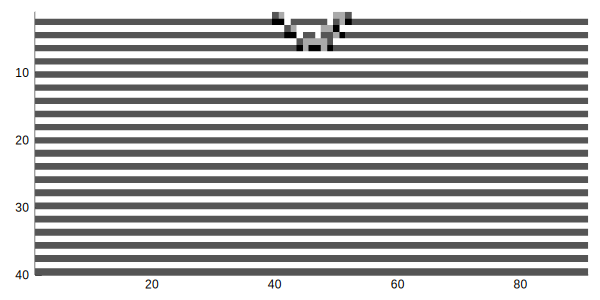

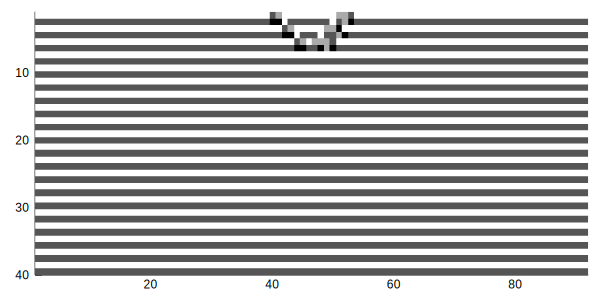

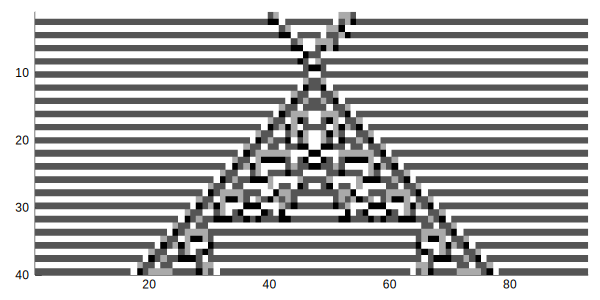

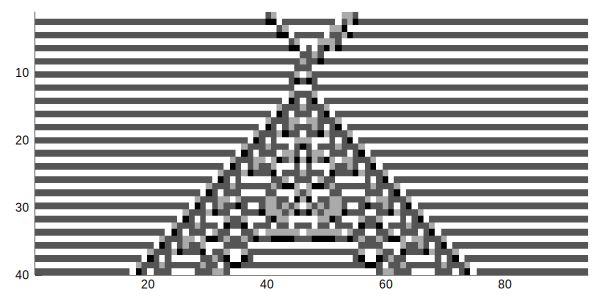

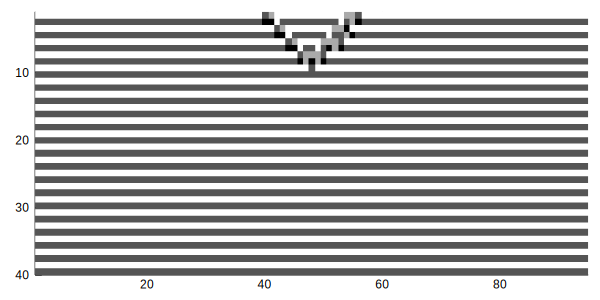

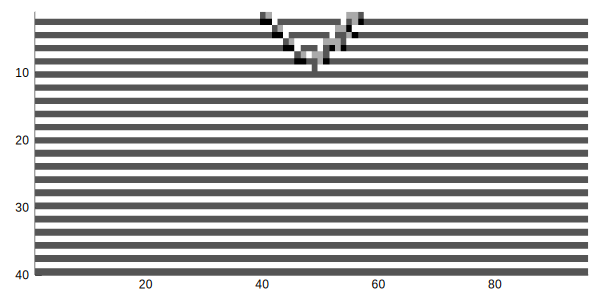

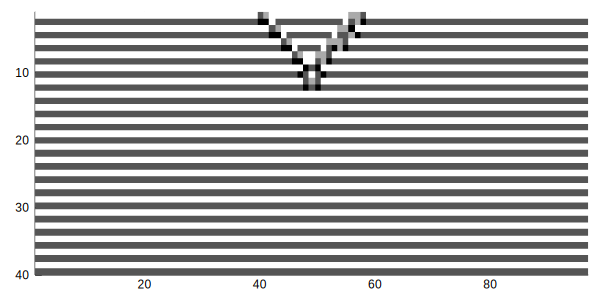

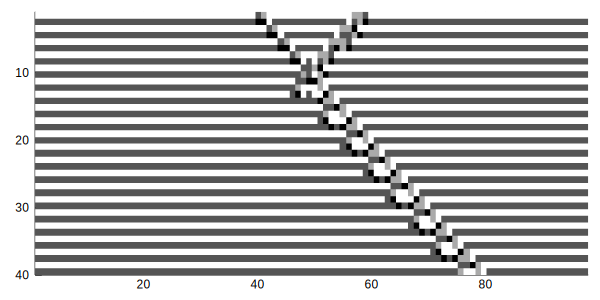

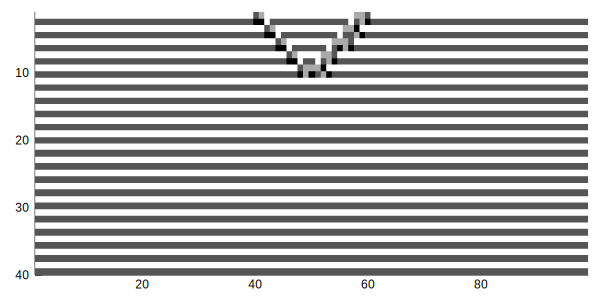

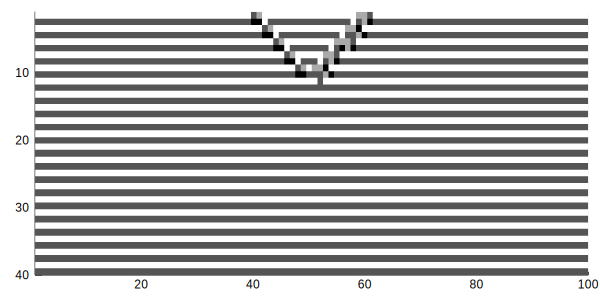

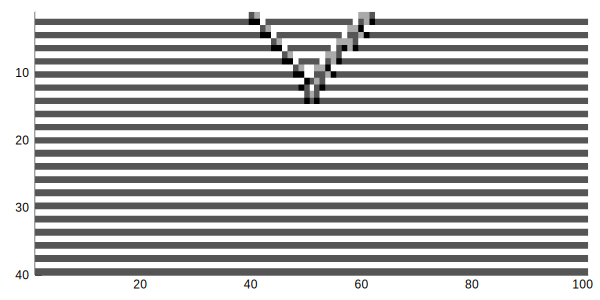

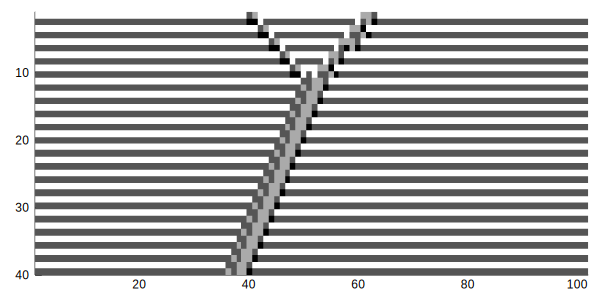

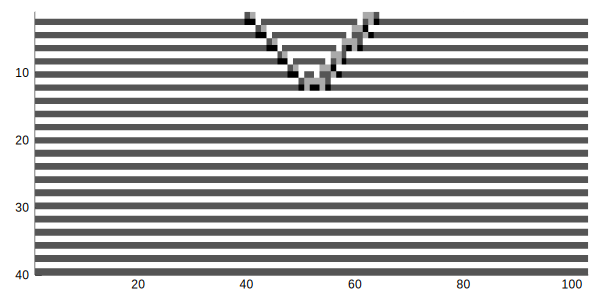

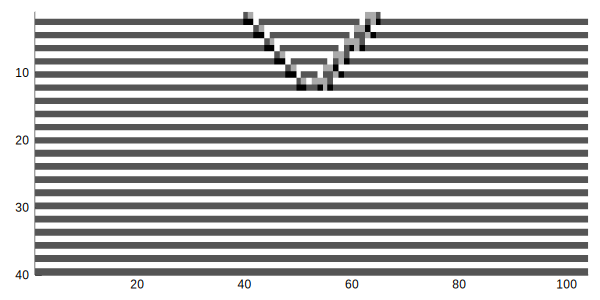

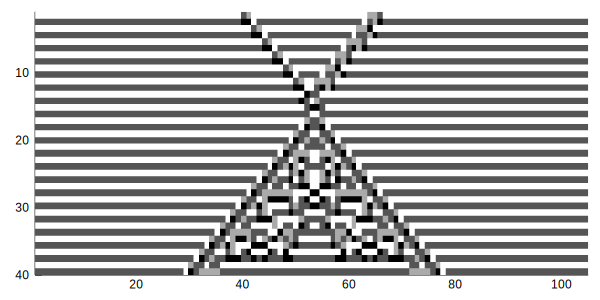

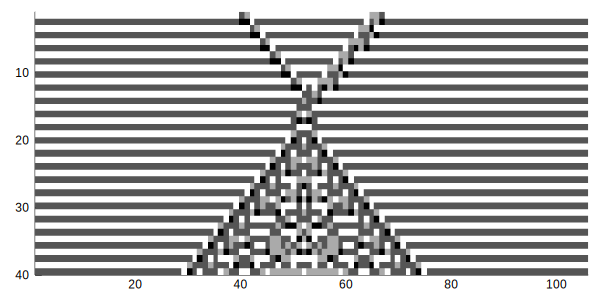

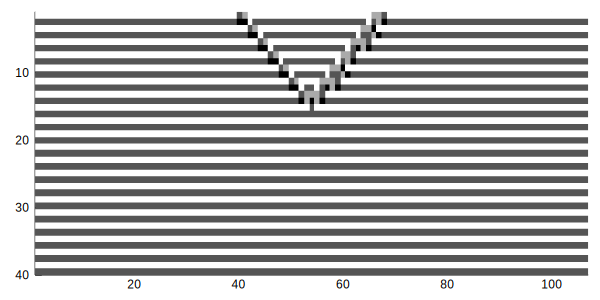

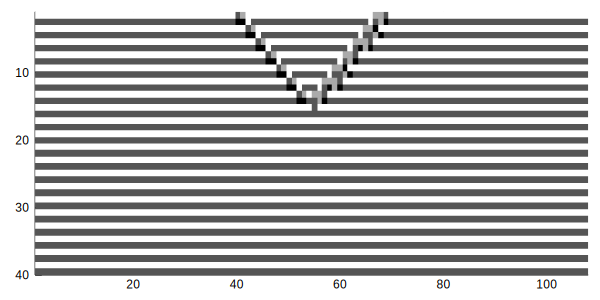

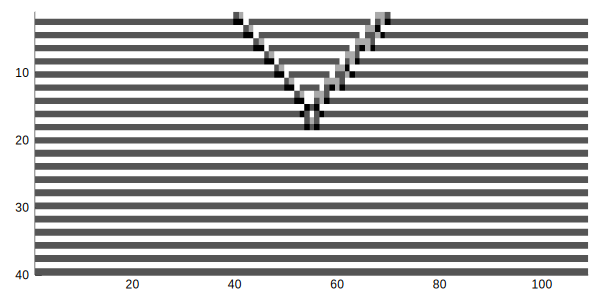

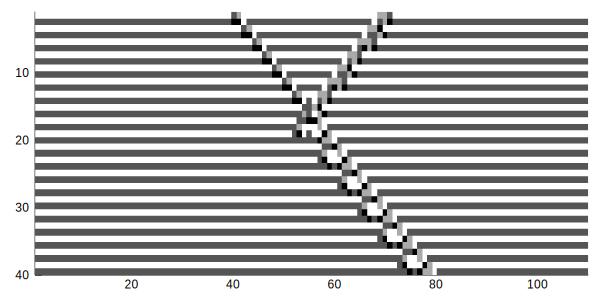

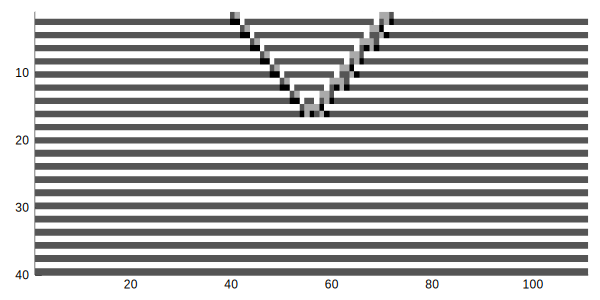

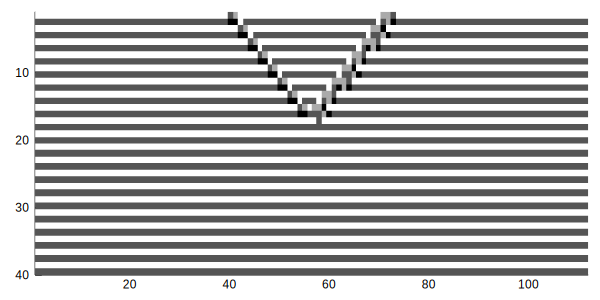

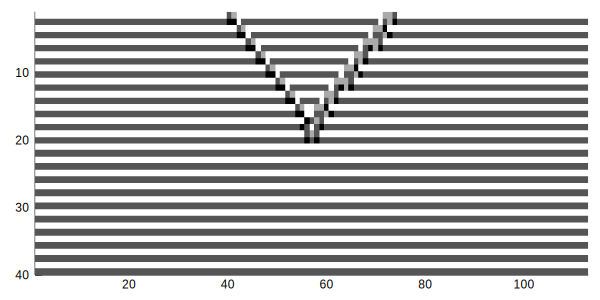

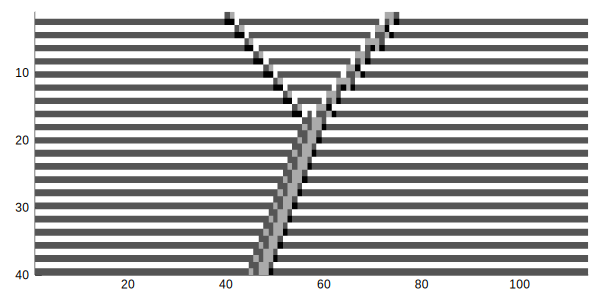

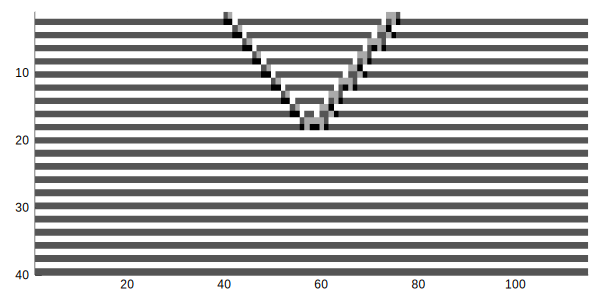

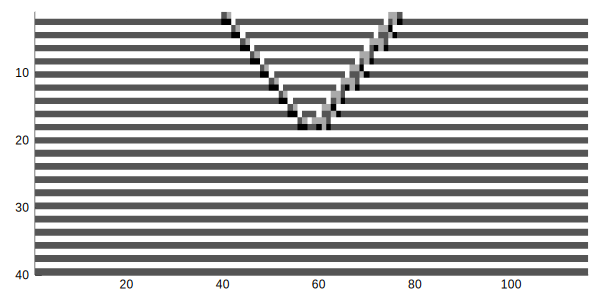

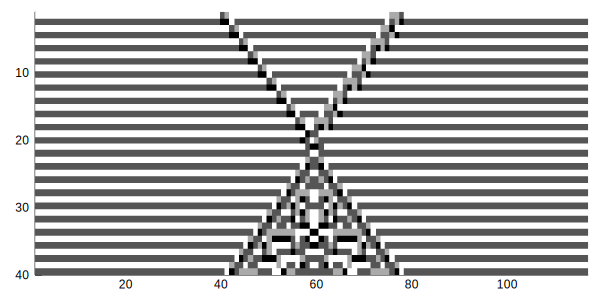

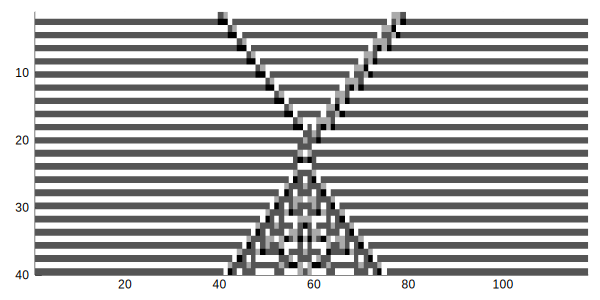

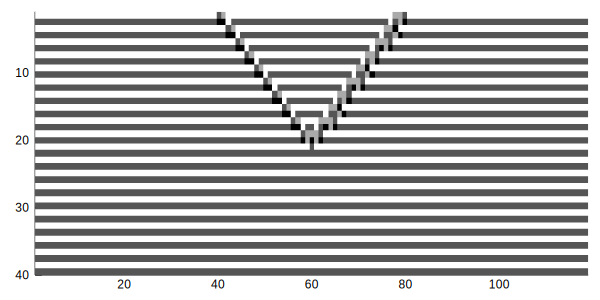

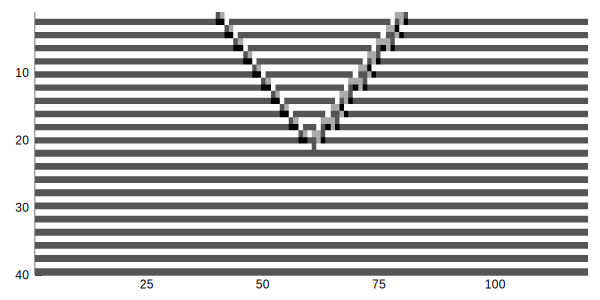

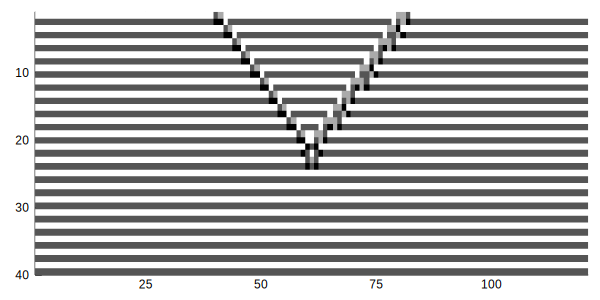

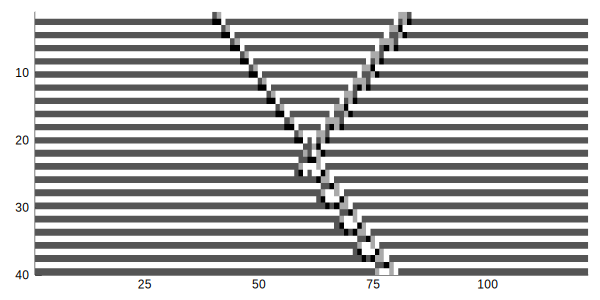

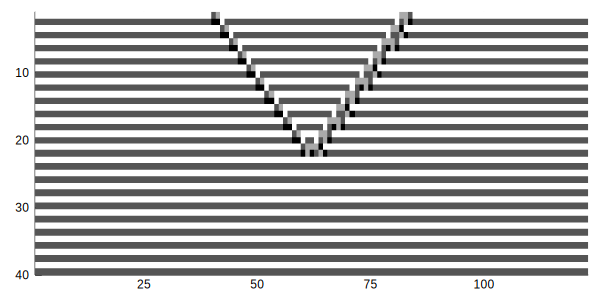

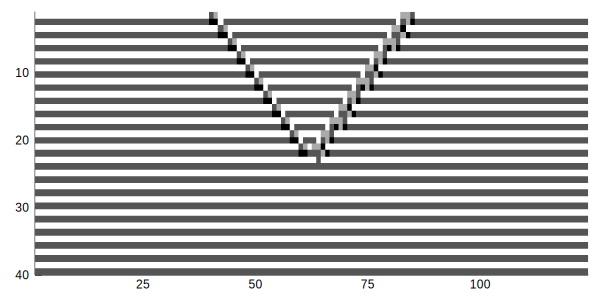

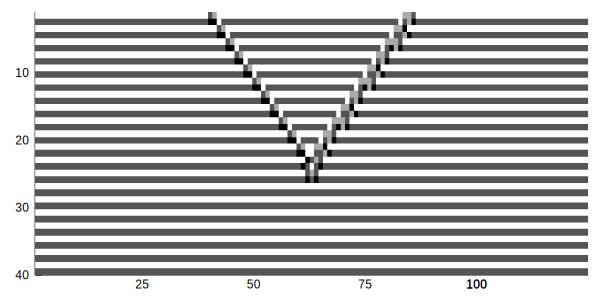

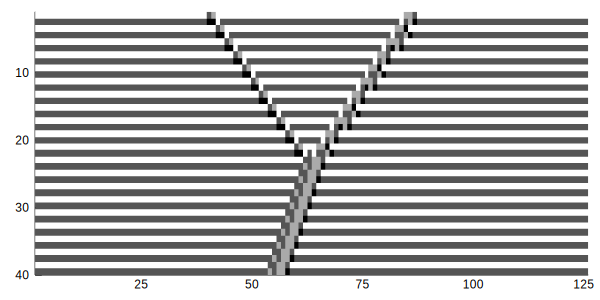

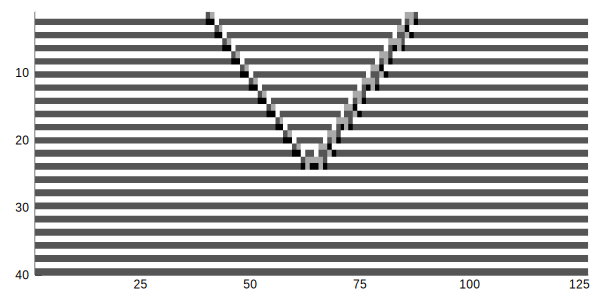

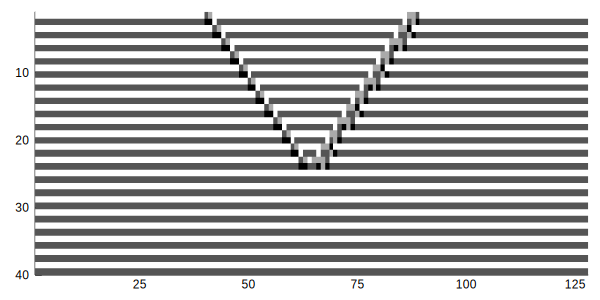

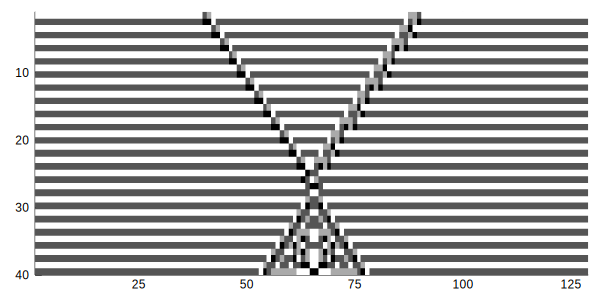

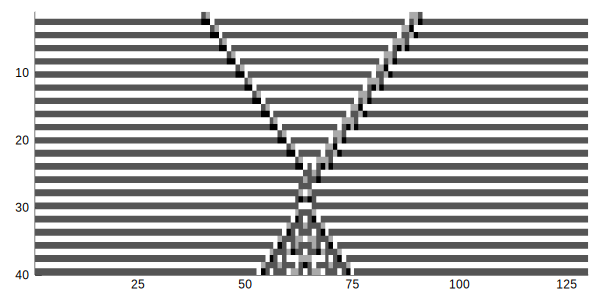

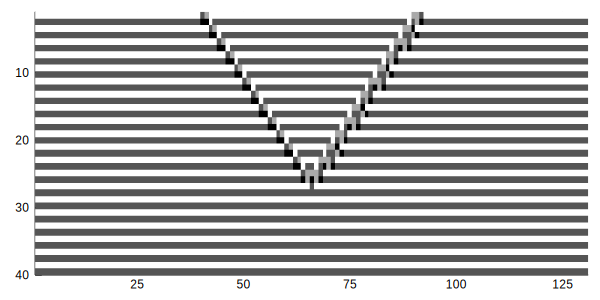

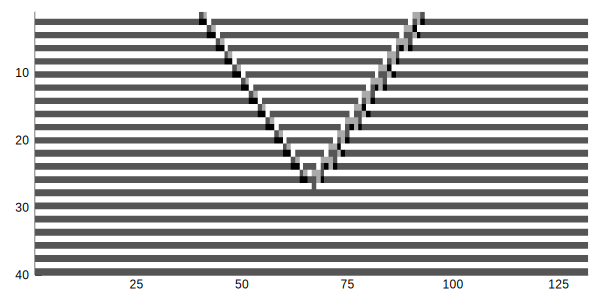

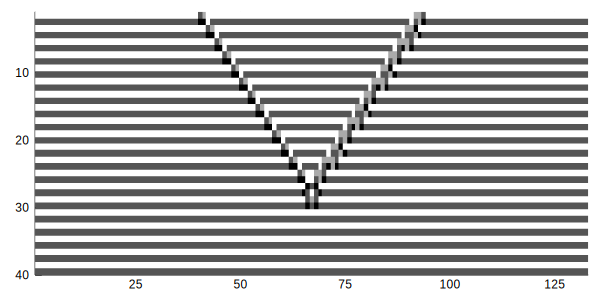

In [512]:
for i = 8:50
    display(plot(
        Gray.(1 .- (Automata.to_array(totalistic(code, 40, colors, UInt8[2, 1, zeros(i)..., 1, 1, 2])))),
        size=(600, 300)
    ))
end

The below plot is an example of a NAND system

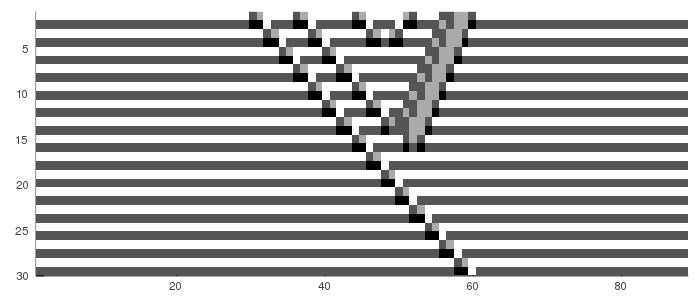

In [527]:
plot(
    Gray.(1 .- (Automata.to_array(totalistic(code, 30, colors, UInt8[2, 1, 0, 0, 0, 0,   2, 1, zeros(UInt8, 6)..., 2, 1, zeros(UInt8, 5)..., 1, 2, zeros(UInt8, 3)..., 2, 2, 1, 1, 2])))),
    size=(700, 300),
    fmt = :png
)

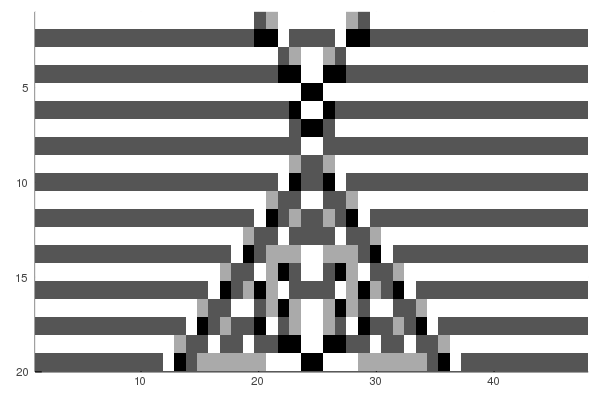

In [257]:
plot(
    Gray.(1 .- (Automata.to_array(totalistic(code, 20, colors, UInt8[2, 1, zeros(UInt8, 6)..., 1, 2])))),
#     size=(600, 300),
    fmt = :png
)

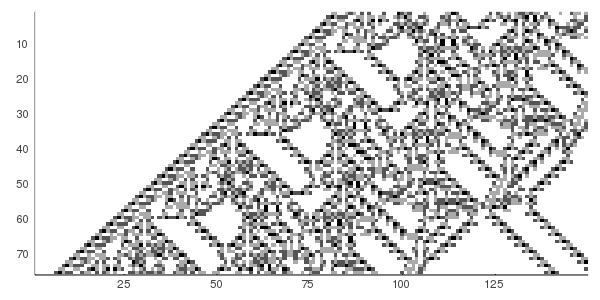

In [132]:
plot(
    Gray.(1 .- diff_arr(Automata.to_array(totalistic(code, 1000, colors, UInt8[3, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 3, 2, 2, 2, 3, 1, 2, 0, 0, 1, 1, 3, 2, 1, 0, 2, 1, 3, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 3, 3, 3, 1, 3, 2, 2, 3, 2, 0, 2, 3, 1, 1, 3, 1, 3, 0, 2, 0, 3, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 3, 2, 3, 2, 2, 3, 2])))[925:1000, 1:150]),
    size=(600, 300),
    fmt = :png
)

In [128]:
join(string.(UInt8.((Automata.to_array(totalistic(code, 500, colors, UInt8[1, 2, 2, 3])))[500, 1:150] .* 3)), "")

"032020000022121200220231322231200113210213320222222220321221000210022333132232023113130203122210221002132322320000000000000000000000000000000000000000"

In [136]:
code_count = 3 * (colors - 1) + 1
code_map = zeros(UInt8, code_count)
for i in 1:code_count
    code_map[i] = (code ÷ Int64(colors)^(i-1)) % Int64(colors)
end
code_map

10-element Array{UInt8,1}:
 0x02
 0x00
 0x02
 0x03
 0x01
 0x02
 0x00
 0x00
 0x00
 0x00